In [55]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [56]:
df = pd.read_csv("C:/Users/Lenovo/Downloads/train_LZdllcl.csv")
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [57]:
df.shape

(54808, 14)

In [58]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [59]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [60]:
# renaming two columns "awards_won?" and "KPIs_met >80%"

df.rename(columns = {'awards_won?':'awards_won',"KPIs_met >80%":"kpi_abv_80"},inplace=True)

In [61]:
# we  have null values in education and previous year rating.
# we are flling the null with respetive to the gender

df[df["gender"]=="m"]['education'].value_counts()

education
Bachelor's          25815
Master's & above    10147
Below Secondary       516
Name: count, dtype: int64

In [62]:
df[df["gender"]=="f"]['education'].value_counts()

education
Bachelor's          10854
Master's & above     4778
Below Secondary       289
Name: count, dtype: int64

In [63]:
# as we can see above the most repeated values in education with respect to gender is "bahcelor's"  for both male and female

df['education'].fillna("Bachelor's",inplace=True)

In [64]:
# education is an ordinal variable we are allocating values from 0 to 2 , where 2 refers highest study and 0 is lowest

df.education.replace({"Bachelor's":1,"Master's & above":2,"Below Secondary":0},inplace=True)

In [65]:
# the thing we have done in case of educaition we are also doing the same for previous year rating

df[df["gender"]=="m"].previous_year_rating.value_counts()

previous_year_rating
3.0    12985
5.0     8139
4.0     6840
1.0     4562
2.0     3004
Name: count, dtype: int64

In [66]:
df[df["gender"]=="f"].previous_year_rating.value_counts()

previous_year_rating
3.0    5633
5.0    3602
4.0    3037
1.0    1661
2.0    1221
Name: count, dtype: int64

In [67]:
# mot repeated value for prvious year reating regard for both males and females is 3.0

df.previous_year_rating.fillna(3.0,inplace=True)

In [68]:
df.avg_training_score.unique()

array([49, 60, 50, 73, 85, 59, 63, 83, 54, 77, 80, 84, 51, 46, 75, 57, 70,
       68, 79, 44, 72, 61, 48, 58, 87, 47, 52, 88, 71, 65, 62, 53, 78, 91,
       82, 69, 55, 74, 86, 90, 92, 67, 89, 56, 76, 81, 45, 64, 39, 94, 93,
       66, 95, 42, 96, 40, 99, 43, 97, 41, 98], dtype=int64)

In [69]:
# in this case training score is an ordinal variable and we have many values that would cause difficulty for our model .
# so we are grouping the values under certian ranges  

cut_name = range(10)

df['traing_score'] = pd.cut(df.avg_training_score,10,labels = cut_name)

In [70]:
# droping the "avg_training_score" as we have gpt a new one

df.drop('avg_training_score',axis = 1,inplace=True)

In [71]:
df.age.describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

<AxesSubplot:>

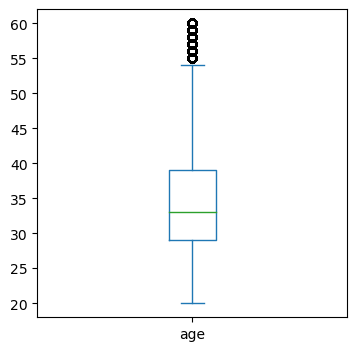

In [72]:
df.age.plot(kind = 'box',figsize = (4,4))

In [73]:
# if employee age is above 60 we would have considered it to be an outlier as they reached the age of retirement. 
# but again retirement age varies in countries 
# many countries allow the employee age till 65 ,so we dont consider age 60 as an outlier here

In [74]:
df.length_of_service.value_counts()

length_of_service
3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: count, dtype: int64

In [75]:
# the thing we did for training_score , doing the same here as length of service has many values
# if it was a continuous variable we would not have done this step

cut_name = range(10)
df.length_of_service = pd.cut(df.length_of_service,bins = 10 , labels=cut_name)

In [76]:
df.length_of_service.value_counts()

length_of_service
0    25100
1    19000
2     5738
3     2623
4     1701
5      267
6      227
7       96
8       51
9        5
Name: count, dtype: int64

In [77]:
# age provided here is a discrete variable .
# so for the  model it is better to convert them to bins as we have large number of  unique values in this age varaible
cut_name = range(10)
df.age = pd.cut(df.age,bins = 10 , labels=cut_name)

In [78]:
# as "department" , "gender,"recruitment_channel" ,"region" are nominal we do one hot encoding.

df1 = pd.get_dummies(df , columns = ["department","gender","recruitment_channel","region"],prefix=["dept","gender","recruit_channel","region"],drop_first=True,dtype=int)

df1.drop(["employee_id"] ,axis = 1,inplace=True)
df1

,education,no_of_trainings,age,previous_year_rating,length_of_service,kpi_abv_80,awards_won,is_promoted,traing_score,dept_Finance,...,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9
0,2,1,3,5.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,2,5.0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,3,3.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,4,1.0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,6,3.0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,1,6,3.0,4,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
54804,2,1,4,2.0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
54805,1,1,1,5.0,0,1,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
54806,1,1,2,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
# here we have an imbalanced dataset

df1.is_promoted.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [80]:
df1 = df1.astype('int32')

In [81]:
df1.columns

Index(['education', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'kpi_abv_80', 'awards_won', 'is_promoted',
       'traing_score', 'dept_Finance', 'dept_HR', 'dept_Legal',
       'dept_Operations', 'dept_Procurement', 'dept_R&D',
       'dept_Sales & Marketing', 'dept_Technology', 'gender_m',
       'recruit_channel_referred', 'recruit_channel_sourcing',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14', 'region_region_15',
       'region_region_16', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_2', 'region_region_20',
       'region_region_21', 'region_region_22', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_30', 'region_region_31',
       'region_region_32', 'region_region_33', 'region_region_34',
       'r

In [82]:
df1.columns[19]

'recruit_channel_sourcing'

In [83]:
# if our data has categorical , ordinal and discrete then SMOTENC is used else SMOTE or ADASYN

from imblearn.over_sampling import SMOTENC

categorical_indices = [i for i in range(5,19) if i not in [7,8]]
ordinal_indices = [0,1,2,3,4,8]

# if we had any discrete variable we would also include this
# but we have converted the discrete to bins and now the are ordinal
# discrete_index = [1]

# smotenc = SMOTENC(categorical_features=categorical_indices + ordinal_indices + discrete_index,n_jobs=-1)

smotenc = SMOTENC(categorical_features=categorical_indices + ordinal_indices,n_jobs=-1)

# Apply SMOTENC to your dataset
x_smote, y_smote = smotenc.fit_resample(df1.drop('is_promoted', axis=1),df1.is_promoted)


In [84]:
print(x_smote.shape)
print(y_smote.shape)
print(np.unique(y_smote,return_counts=True))

(100280, 52)
(100280,)
(array([0, 1]), array([50140, 50140], dtype=int64))


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB ,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier , ExtraTreesClassifier , BaggingClassifier
from sklearn.metrics import f1_score , confusion_matrix , recall_score
import time

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size=0.25,stratify=y_smote)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(75210, 52) (75210,)
(25070, 52) (25070,)


In [33]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

<IPython.core.display.Javascript object>

In [34]:
# not including svm as its taking long time
clfs = {'KN' : knc, 'NB': mnb,'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'Bc': bc, 'ETC': etc,'GBDT':gbdt,'xgb':xgb ,"svc" : svc}

In [35]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    
    f1_train = f1_score(y_train,clf.predict(x_train))
    recall_train = recall_score(y_train,clf.predict(x_train))

    f1_test = f1_score(y_test,y_pred)
    recall_test = recall_score(y_test,y_pred)
    
    return f1_train , recall_train , f1_test , recall_test

In [36]:
# promoted is 1 and not promoted is 0
# we are considering recall in this case because we may have two models with same f1-score 
# then we will select the one with better recall
# this is beacuse we dont want our model predict an employee as not promoted to an employee who is actually promoted .
# this will bring down the morale of loyal and hardworking employees
# the more that happens the more goes down the morale of hard working a loyal employees .

time.sleep(1)
start_ = time.time()

f1_scores_train = []
recall_scores_train = []
f1_scores_test = []
recall_scores_test = []

for name,clf in clfs.items():
    
    f1_train , recall_train , f1_test , recall_test = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("      f1_train ",f1_train)
    print("      recall_train ",recall_train)
    print("      f1_test ",f1_test)
    print("      recall_test ",recall_test,'\n')

    f1_scores_train.append(f1_train)
    recall_scores_train.append(recall_train)
    f1_scores_test.append(f1_test)
    recall_scores_test.append(recall_test)

    
print(f"total time taken to complete training fo all models is  : {(time.time()-start_)/60}")

For  KN
      f1_train  0.9270365699873897
      recall_train  0.9774498072064886
      f1_test  0.9031013503487164
      recall_test  0.9710410849621061 

For  NB
      f1_train  0.7201943969451907
      recall_train  0.7447945751894695
      f1_test  0.7171080610864101
      recall_test  0.7398484244116473 

For  DT
      f1_train  0.8271841812604641
      recall_train  0.8999601116872756
      f1_test  0.822411461569387
      recall_test  0.8975668129238134 

For  LR
      f1_train  0.8130479364265573
      recall_train  0.8434250764525993
      f1_test  0.8089715031876488
      recall_test  0.8402074192261667 

For  RF
      f1_train  0.9836000894301458
      recall_train  0.994415636218588
      f1_test  0.9434006853361692
      recall_test  0.9554048663741523 

For  AdaBoost
      f1_train  0.8172289423314801
      recall_train  0.834516686610823
      f1_test  0.8120353705297754
      recall_test  0.8278420422816115 

For  Bc
      f1_train  0.9835367136545341
      recall_train

In [37]:
# this is the performance considering region variable
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'f1_train':f1_scores_train,'recall_train':recall_scores_train,'f1_test':f1_scores_test,'recall_test':recall_scores_test}).sort_values('f1_test',ascending=False)

In [38]:
performance_df

,Algorithm,f1_train,recall_train,f1_test,recall_test
7,ETC,0.983614,0.992076,0.943765,0.951256
4,RF,0.983600,0.994416,0.943401,0.955405
6,Bc,0.983537,0.994495,0.937300,0.957639
0,KN,0.927037,0.977450,0.903101,0.971041
9,xgb,0.898312,0.945885,0.889653,0.938732
8,GBDT,0.842125,0.905544,0.835984,0.901476
2,DT,0.827184,0.899960,0.822411,0.897567
5,AdaBoost,0.817229,0.834517,0.812035,0.827842
3,LR,0.813048,0.843425,0.808972,0.840207
1,NB,0.720194,0.744795,0.717108,0.739848


In [39]:
# Voting Classifier
# etc , rfc and bgc performed best so we select those three for voting classifier and stacking classifier

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [40]:
voting = VotingClassifier(estimators=[('bgc', bc), ('rf', rfc), ('et', etc)],voting='soft')

In [42]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('bgc',
                              BaggingClassifier(n_estimators=50,
                                                random_state=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [43]:
y_pred = voting.predict(x_test)
print("f1_score",f1_score(y_test,y_pred))
print("recall",recall_score(y_test,y_pred))

f1_score 0.9443701314029428
recall 0.9574790586358197


In [44]:
# Applying stacking
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

estimators=[('bgc', bc), ('rf', rfc), ('et', etc)]
final_estimator=RandomForestClassifier()

In [45]:
from sklearn.ensemble import StackingClassifier

In [46]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [47]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("f1_score",f1_score(y_test,y_pred))
print("recall",recall_score(y_test,y_pred))

f1_score 0.9454283772438332
recall 0.9432788193059434


In [53]:
print(clf.get_params)

<bound method _BaseHeterogeneousEnsemble.get_params of StackingClassifier(estimators=[('bgc',
                                BaggingClassifier(n_estimators=50,
                                                  random_state=2)),
                               ('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())>


In [ ]:
# this are the best parameters for RFC using GRIDsearchCV

In [87]:
rfc = RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='log2', min_samples_split=5,
                       n_estimators=300, n_jobs=-1, random_state=123)

rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='log2', min_samples_split=5,
                       n_estimators=300, n_jobs=-1, random_state=123)

In [88]:
print(f1_score(y_train,rfc.predict(x_train)))
print(f1_score(y_test,rfc.predict(x_test)))

0.9820278686794046
0.9455903978379236


In [89]:
print("test_recall",recall_score(y_test,rfc.predict(x_test)))

test_recall 0.9490227363382528


# RFC with the above parameter fperforms best